# Playground

In [2]:
import scipy.io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
mat_data = scipy.io.loadmat('/train_1/1_12_1.mat')

In [ ]:
' :: '.join([str(mat_data['__header__']), str(mat_data['__version__']), str(mat_data['__globals__'])])

In [ ]:
data = mat_data['dataStruct']
for i in [data, data[0], data[0][0][0], data[0][0][0][0]]:
    print((i.shape, i.size))


In [ ]:
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
x = data[0][0][0]

count = 8
for i in range(count * 2):
    plt.subplot(16, 1, i + 1)
    plt.plot(x[:, i])

In [ ]:
x_std = x.std(axis=1, dtype=np.float64)
print(x_std.shape, x_std.ndim)

x_split = np.array(np.split(x_std, 100))
print(x_split.shape)

x_mean = np.mean(x_split, axis=0)
print(x_mean.shape)

In [ ]:
plt.subplot(3, 1, 1)
plt.plot(x)
plt.subplot(3, 1, 2)
plt.plot(x_std)
plt.subplot(3, 1, 3)
plt.plot(x_mean)

[('data', 'O'), ('iEEGsamplingRate', 'O'), ('nSamplesSegment', 'O'), ('channelIndices', 'O'), ('sequence', 'O')] (1,) object
float32


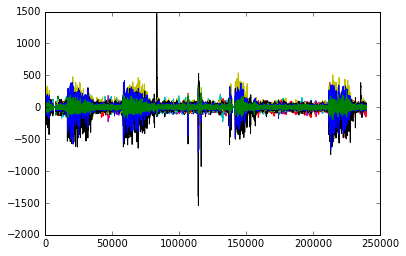

In [16]:
import scipy.io
mat_data = scipy.io.loadmat('/train_1/1_45_1.mat', verify_compressed_data_integrity=False)
data = mat_data['dataStruct']
print(data.dtype, data['sequence'][0].shape, data['sequence'].dtype)
x = data[0][0][0]
print(x.dtype)
plt.plot(x)

(16, 16) 256
X shape: (16, 16)
(16, 16) 256
X shape: (16, 32)
(16, 16) 256
X shape: (16, 48)
(16, 16) 256
X shape: (16, 64)


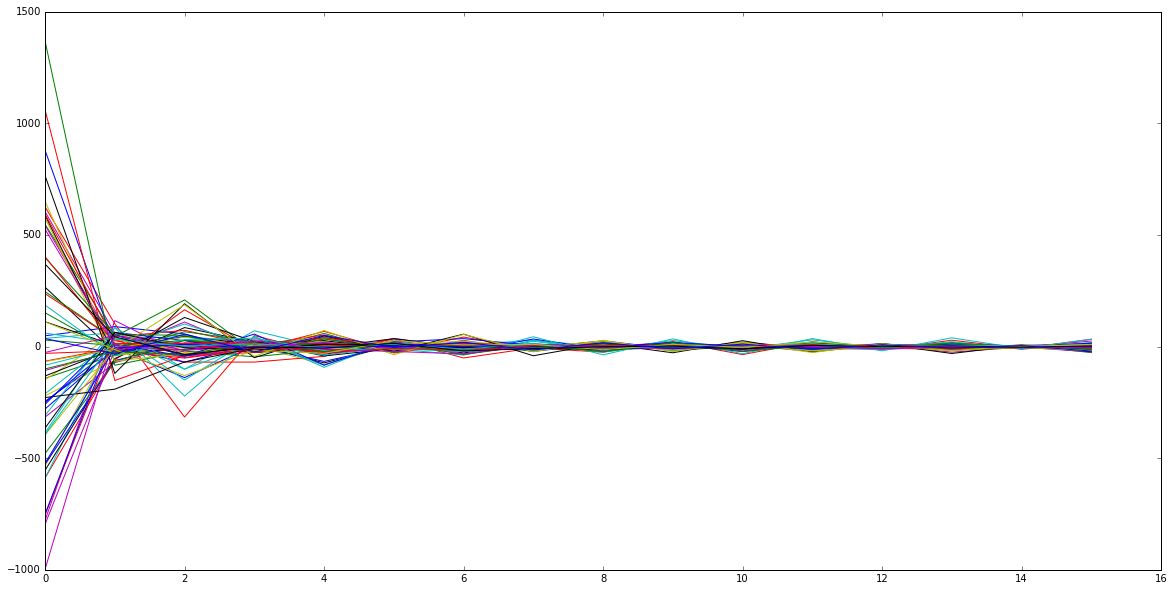

In [13]:
from scipy.fftpack import rfft

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

n = 16
n2 = 256

mat_data = scipy.io.loadmat('/train_1/1_1_0.mat')
data = mat_data['dataStruct']
x = data[0][0][0]

x_fft = rfft(x, n=n, axis=0)[:n2]
print(x_fft.shape, x_fft.size)

X = x_fft
print('X shape:', X.shape)

# plt.subplot(2, 2, 1)
# plt.plot(x_fft)

mat_data = scipy.io.loadmat('/train_1/1_1_1.mat')
data = mat_data['dataStruct']
x = data[0][0][0]

x_fft = rfft(x, n=n, axis=0)[:n2]
print(x_fft.shape, x_fft.size)

X = np.column_stack([X, x_fft])
print('X shape:', X.shape)

# plt.subplot(2, 2, 2)
# plt.plot(x_fft)

mat_data = scipy.io.loadmat('/train_1/1_2_0.mat')
data = mat_data['dataStruct']
x = data[0][0][0]

x_fft = rfft(x, n=n, axis=0)[:n2]
print(x_fft.shape, x_fft.size)

X = np.column_stack([X, x_fft])
print('X shape:', X.shape)

# plt.subplot(2, 2, 3)
# plt.plot(x_fft)

mat_data = scipy.io.loadmat('/train_1/1_2_1.mat')
data = mat_data['dataStruct']
x = data[0][0][0]

x_fft = rfft(x, n=n, axis=0)[:n2]
print(x_fft.shape, x_fft.size)

X = np.column_stack([X, x_fft])
print('X shape:', X.shape)

# plt.subplot(2, 2, 4)
# plt.plot(x_fft)

plt.plot(X)

In [ ]:
import itertools

from scipy import signal


sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

correlations = [
    signal.correlate(X[a], X[b], mode='same')
    for (a, b) in itertools.combinations(range(16), 2)
]
max_corr = np.maximum(*correlations)

In [15]:
# Cross correlation
N = 400

def correlation_a_b(a, b, t, offset=0):
    
    if t < 0:
        return correlation_a_b(b, a, -t, offset)
    
    A = None
    for i in range(N - t):
        new_slice = a[offset + i: offset + i + t]
        A = np.vstack([A, new_slice]) if A is not None else new_slice
        
    return np.sum(b[offset: offset + t] * A) * 1 / (N - t)

def cross_correlation(a, b):
    max_correlations = []
    for offset in range(0, 10 * 60 * 400, 400):
        correlations = []
        for t in np.arange(-.5, .5, 0.1):
            t = int(round(N * t))
            correlations.append(correlation_a_b(a, b, t, offset))

        max_correlations.append(max(correlations))
    
    return max_correlations

%time corr = cross_correlation(X[0], X[1])
len(corr)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

# NIH Seizure

In [1]:
base = '/train_1/'
base_tests = '/test_1/'

Load the Data Scientist weapons

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

### Create some usefull methods

In [3]:
# Saves the data to a CSV file
def delete_content(file):
    with open(file, "w"):
        pass
# delete_content('train_1.csv')
# np.savetxt('train_1.csv', rows, fmt='%10.8f', delimiter=',')

In [4]:
def get_class_from_name(name):
    """
    Gets the class from the file name.
    
    The class is defined by the last number written in the file name.
    For example:
    
    Input: ".../1_1_1.mat"
    Output: 1.0
    
    Input: ".../1_1_0.mat"
    Output: 0.0
    """
    try:
        return float(name[-5])
    except:
        return 0.0

assert get_class_from_name('/train_1/1_1_0.mat') == 0.0
assert get_class_from_name('/train_1/1_1_1.mat') == 1.0

In [15]:
from scipy.fftpack import rfft


def get_X_files_and_y(base_dir, train_samples=600):
    ignored_files = ['.DS_Store', '1_45_1.mat']

    X_files = np.array([])
    y = np.array([])

    for i, filename in enumerate(os.listdir(base_dir)):
        if filename in ignored_files:
            continue

        X_files = np.append(X_files, str(filename))
        y = np.append(y, get_class_from_name(filename))  # The number of readings

        if i >= train_samples:
            break
    
    return X_files, y


def get_X_from_files(base_dir, files, show_progress=True):
    """
    Given a list of filenames, returns the Standard deviation of the content of each file as a row.
    """
    X = None
    n = 128

    total_files = len(files)

    for i, filename in enumerate(files):
        if show_progress and i % int(total_files / 10) == 0:
            print(u'%{}: Loading file {}'.format(int(i * 100 / total_files), filename))

        try:
            mat_data = scipy.io.loadmat(''.join([base_dir, filename]))
        except ValueError as ex:
            print(u'Error loading MAT file {}: {}'.format(filename, str(ex)))
            continue

        data = mat_data['dataStruct'][0][0][0]
        x_fft = rfft(data, n=n, axis=0)

        X = np.vstack([X, x_fft]) if X is not None else x_fft
    
    return X

In [9]:
# Utility function to report best scores
from operator import itemgetter

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

## Load the files and calculate their Standar deviation

Get the file names from the train folder and separates the files into training sets.

This will help to perform the `cross-validation` algorithm with these datasets.

In [11]:
import os

from sklearn.cross_validation import train_test_split
    
X_files, y = get_X_files_and_y(base, train_samples=200)
X_train_files, X_test_files, y_train, y_test = train_test_split(X_files, y, test_size=0.33, random_state=42)

Get the `X_train` and `X_test` data from the files.

The `y_train` and `y_test` will match the X sets sinces they were loaded in order.

In [16]:
%time X_train = get_X_from_files(base_dir=base, files=X_train_files)
%time X_test = get_X_from_files(base_dir=base, files=X_test_files)
print(u'X_train shape: {} - y_train shape: {}'.format(X_train.shape, y_train.shape))
print(u'X_test shape: {} - y_test shape: {}'.format(X_test.shape, y_test.shape))

%0: Loading file 1_856_0.mat
%9: Loading file 1_999_0.mat
%19: Loading file 1_91_1.mat
%29: Loading file 1_900_0.mat
%38: Loading file 1_916_0.mat
%48: Loading file 1_970_0.mat
%58: Loading file 1_920_0.mat
%67: Loading file 1_907_0.mat
%77: Loading file 1_932_0.mat
%87: Loading file 1_806_0.mat
%97: Loading file 1_904_0.mat
CPU times: user 8.46 s, sys: 3.38 s, total: 11.8 s
Wall time: 15.4 s
%0: Loading file 1_971_0.mat
%8: Loading file 1_94_1.mat
%17: Loading file 1_835_0.mat
%26: Loading file 1_960_0.mat
%35: Loading file 1_947_0.mat
%44: Loading file 1_8_1.mat
%53: Loading file 1_80_1.mat
%62: Loading file 1_924_0.mat
%71: Loading file 1_817_0.mat
%80: Loading file 1_98_1.mat
%89: Loading file 1_83_0.mat
%98: Loading file 1_928_0.mat
CPU times: user 4.88 s, sys: 1.22 s, total: 6.1 s
Wall time: 7.49 s
X_train shape: (17152, 16) - y_train shape: (134,)
X_test shape: (8576, 16) - y_test shape: (67,)


Create a GridSearch to find the best hyperparameters for the classifier

In [ ]:
from time import time

from sklearn import linear_model
from sklearn.grid_search import GridSearchCV

clf = linear_model.LogisticRegression(class_weight='balanced', n_jobs=-1)

param_grid = {
    'C': [0.001, 0.1, 1, 10, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'tol': [0.0001, 0.001, 0.01, 0.1],
}

# run grid search
# grid_search = GridSearchCV(clf, param_grid=param_grid, verbose=1)
# start = time()
# grid_search.fit(X_train, y_train)

# print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
#       % (time() - start, len(grid_search.grid_scores_)))
# report(grid_search.grid_scores_)

Create and run the Linear Classifier

In [ ]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(class_weight={1:1000, 0:1}, n_jobs=1, solver='lbfgs', C=1e5)

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

In [ ]:
from sklearn.svm import SVC

clf = SVC(class_weight='balanced', probability=True)

In [ ]:
%time clf.fit(X_train, y_train)
clf.score(X_test, y_test), len([i for i in y_test if i == 0]), len([i for i in y_test if i == 1])

In [ ]:
clf

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

%time y_pred = clf.predict(X_test)

print(u'Accuracy:', accuracy_score(y_test, y_pred))
print(u'Precision:', precision_score(y_test, y_pred))
print(u'Recall:', recall_score(y_test, y_pred))
print(u'F1 score:', f1_score(y_test, y_pred, average='binary'))

In [ ]:
%time y_pred = clf.predict_proba(X_test)

y_pred = y_pred[:, 0] * y_pred[:, 1]

import pandas

dtypes = [('File', 'S16'), ('Class', 'float32')]
data = np.array(list(zip(X_test_files, y_pred)), dtype=dtypes)

print(X_test_files[1:5])

data_frame = pandas.DataFrame(data)
data_frame['File'] = data_frame['File'].astype(str)

csv = data_frame.to_csv(float_format='%.5f', index=False).replace("b'", "'")

with open('train_1.csv', 'w') as f:
    f.write(csv)